In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, neighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [88]:
df = pd.read_csv('data/study-table.csv')

In [89]:
df.head()

,gender,race,postal_code,occupation,weight,bp_hosp_min,bp_hosp_max,diabetes,hiv,cancer,dexamethasone,erlotinib,bp_disch_min,bp_disch_max,readmission
0,female,black,42956,builder,115,64,88,1,0,0,1,0,40,109,0
1,male,white,40369,engineer,112,66,75,0,0,1,0,1,40,108,0
2,female,asian,44890,doctor,46,55,80,0,1,1,0,0,41,106,0
3,female,native_american,40614,builder,104,41,103,0,1,1,0,0,40,109,1
4,male,asian,43761,firefighter,67,49,103,0,0,0,1,0,40,109,0


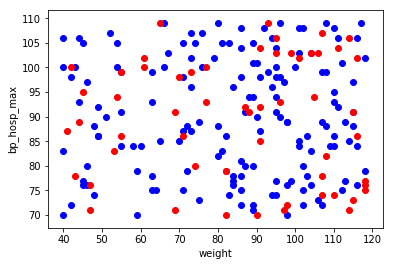

In [97]:
ix0 = df['readmission'] == 0
ix1 = df['readmission'] == 1

plt.scatter(df.loc[ix0, 'weight'].values, df.loc[ix0, 'bp_hosp_max'].values, c='b')
plt.scatter(df.loc[ix1, 'weight'].values, df.loc[ix1, 'bp_hosp_max'].values, c='r')
plt.xlabel('weight')
plt.ylabel('bp_hosp_max')
plt.show()

In [84]:
# Separate the outcomes from the input features
outcomes = df['readmission'].values
df = df.iloc[:, :-1]

In [85]:
df.head()

,gender,race,postal_code,occupation,weight,bp_hosp_min,bp_hosp_max,diabetes,hiv,cancer,dexamethasone,erlotinib,bp_disch_min,bp_disch_max
0,female,black,42956,builder,115,64,88,1,0,0,1,0,40,109
1,male,white,40369,engineer,112,66,75,0,0,1,0,1,40,108
2,female,asian,44890,doctor,46,55,80,0,1,1,0,0,41,106
3,female,native_american,40614,builder,104,41,103,0,1,1,0,0,40,109
4,male,asian,43761,firefighter,67,49,103,0,0,0,1,0,40,109


In [48]:
# WAIT, STILL NEED PREPROCESSING!

# Convert categorical features

categoricals = []

for feature in ['gender', 'race', 'postal_code', 'occupation']:
    categoricals.append(pd.get_dummies(df[feature], prefix=feature))
    del(df[feature])

In [49]:
df = pd.concat([df] + categoricals, axis=1)

In [50]:
df.head()

,weight,bp_hosp_min,bp_hosp_max,diabetes,hiv,cancer,dexamethasone,erlotinib,bp_disch_min,bp_disch_max,...,postal_code_44909,postal_code_44929,postal_code_44931,postal_code_44937,postal_code_44976,occupation_builder,occupation_doctor,occupation_engineer,occupation_firefighter,occupation_teacher
0,115,64,88,1,0,0,1,0,40,109,...,0,0,0,0,0,1,0,0,0,0
1,112,66,75,0,0,1,0,1,40,108,...,0,0,0,0,0,0,0,1,0,0
2,46,55,80,0,1,1,0,0,41,106,...,0,0,0,0,0,0,1,0,0,0
3,104,41,103,0,1,1,0,0,40,109,...,0,0,0,0,0,1,0,0,0,0
4,67,49,103,0,0,0,1,0,40,109,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df, outcomes,
                                                    train_size=0.75, test_size=0.25,
                                                    random_state=0)
print('Number of training records: %d' % len(x_train))
print('Number of testing records: %d' % len(x_test))


Number of training records: 157
Number of testing records: 53


In [55]:
# LR
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)
y_predict_lr = clf_lr.predict(x_test)

# KNN
clf_knn = neighbors.KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
y_predict_knn = clf_knn.predict(x_test)

# SVM
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
y_predict_svm = clf_svm.predict(x_test)

# And GB
clf_gb = GradientBoostingClassifier()
clf_gb.fit(x_train, y_train)
y_predict_gb = clf_gb.predict(x_test)

In [58]:
def confusion_matrix_df(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns=['Predict 0', 'Predict 1'], index=['Actual 0', 'Actual 1'])
    return cm

In [73]:
print('LR results:')
display(confusion_matrix_df(y_test, y_predict_lr))
print('Coefficients of first 10 features: ')
print(list(df.columns[:10]))
print(clf_lr.coef_[0][:10], '\n')

print('KNN results:')
display(confusion_matrix_df(y_test, y_predict_knn))

print('SVM results:')
display(confusion_matrix_df(y_test, y_predict_svm))

print('GB results:')
display(confusion_matrix_df(y_test, y_predict_gb))

LR results:


,Predict 0,Predict 1
Actual 0,33,6
Actual 1,13,1


Coefficients of first 10 features: 
['weight', 'bp_hosp_min', 'bp_hosp_max', 'diabetes', 'hiv', 'cancer', 'dexamethasone', 'erlotinib', 'bp_disch_min', 'bp_disch_max']
[ 0.01380815 -0.01544398 -0.00195594 -0.33848319 -0.2373213  -0.49754355
 -0.09407885 -0.76408747  0.14091474 -0.05684233] 

KNN results:


,Predict 0,Predict 1
Actual 0,29,10
Actual 1,10,4


SVM results:


,Predict 0,Predict 1
Actual 0,38,1
Actual 1,13,1


GB results:


,Predict 0,Predict 1
Actual 0,38,1
Actual 1,14,0
